ワードクラウドを作成する例

In [1]:
# 簡単な文章をワードクラウドのする例
data1 = '苔いちめんに、霧がぽしゃぽしゃ降ふって、蟻の歩哨は鉄の帽子のひさしの下から、するどいひとみであたりをにらみ、青く大きな羊歯の森の前をあちこち行ったり来たりしています。'
data1 = data1 + '向からぷるぷるぷるぷる一ぴきの蟻の兵隊が走って来ます。'

mecabのインストールなどはテキストどおり行うこと

In [2]:
%%bash

apt install -yq \
  mecab \
  mecab-ipadic-utf8 \
  libmecab-dev
pip install -q mecab-python3==0.996.5
ln -s /etc/mecabrc /usr/local/etc/mecabrc

Reading package lists...
Building dependency tree...
Reading state information...
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-11-0 cuda-nsig

In [3]:
pip list | grep mecab

mecab-python3                 0.996.5


In [4]:
# フォントのインストール
!apt-get -yq install fonts-ipafont-gothic

Reading package lists...
Building dependency tree...
Reading state information...
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-11-0 cuda-nsig

In [5]:
# matplotの日本語化
!pip install -q japanize-matplotlib

     |████████████████████████████████| 4.1 MB 5.7 MB/s 


In [6]:
# MeCabのインストール
import MeCab

tagger = MeCab.Tagger()

# tagger.parse(【対象の文字列】)
# 対象の文章の形態素解析を行う。（日本語を最小単位の品詞に分解する）
parsed = tagger.parse(data1).split('\n')

# 形態素解析の結果である「parsed」の出力結果を確認する
# ※先頭の10行のみ表示
parsed[:10]

['苔\t名詞,一般,*,*,*,*,苔,コケ,コケ',
 'いち\t名詞,一般,*,*,*,*,いち,イチ,イチ',
 'めん\t名詞,一般,*,*,*,*,めん,メン,メン',
 'に\t助詞,格助詞,一般,*,*,*,に,ニ,ニ',
 '、\t記号,読点,*,*,*,*,、,、,、',
 '霧\t名詞,一般,*,*,*,*,霧,キリ,キリ',
 'が\t助詞,格助詞,一般,*,*,*,が,ガ,ガ',
 'ぽし\t形容詞,接尾,*,*,形容詞・アウオ段,文語基本形,ぽい,ポシ,ポシ',
 'ゃぽしゃ\t名詞,一般,*,*,*,*,*',
 '降\t動詞,自立,*,*,五段・ラ行,体言接続特殊２,降る,クダ,クダ']

In [7]:
# 上記のデータのように形態素解析の結果は、1行の中の\t(タブ文字)の左側のみが単語データです。
# 一行の中を\tで区切って、単語データのみをWordCloudの元データとします。

import re

# parsedの中のデータを1行ずつ読み取り、「\t」か「,」でsplitする
items = (re.split('[\t,]', line) for line in parsed)

words = []
for item in items:
  if item[0] == 'EOS' or item[0] == '':
    pass
  elif item[1] in ["名詞", "形容詞", "動詞", "副詞"]:
    # 助詞、助動詞は含めない
    words.append(item[0])

# textがワードクラウド生成の対象
# 生成したwordsを文字列にしてtextに格納
text = ' '.join(words)

In [8]:
# WordCloudを表示する準備
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import japanize_matplotlib

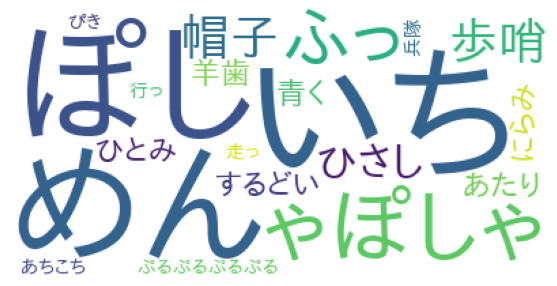

In [9]:
# フォントをインストールしたパス（ここは変更しなくてよい）
font_path = 'usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'

# ここでワードクラウドの元データを生成している
cloud = WordCloud(background_color='white', font_path=font_path).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(cloud)
plt.axis("off")
# ファイル名は適宜変更してください
plt.savefig('wc_noun_base_2.png')
plt.show()